In [1]:
import matplotlib.pyplot as plt
from deap import gp
from deap.tools import Logbook
from typing import Callable, TypeVar, Iterable
import pickle, os, numpy as np
from run_gp import RunInfo
from shared_tools.make_datasets import x_train, y_train, x_validation, y_validation, x_test, y_test
from simple_pred.pset import create_pset
from shared_tools.toolbox import create_toolbox
from functools import partial
from dataclasses import dataclass
from main import parser
from tree import Tree
from IPython.display import Image
import matplotlib

In [2]:
parameters = parser.parse_args([])

datasets = {
    "train": (x_train, y_train),
    "validation": (x_validation, y_validation),
    "test": (x_test, y_test)
}

pset = create_pset(*x_train[0].shape)

toolbox = create_toolbox(datasets, pset, parameters)

In [3]:
def plot(logbook: Logbook) -> None:
    gen = logbook.select("gen")

    size_avgs = logbook.chapters["size"].select("avg")

    fig, axs = plt.subplots(2, 2)
    combinations = zip(["min", "max", "avg"], ["red", "green", "blue"])

    for ax, (setting, color) in zip(axs.flat, combinations):
        ax.plot(gen, logbook.chapters["fitness"].select(setting),
                color=color, label=f"fitness_{setting}")
        ax.set_title(f"Fitness {setting}")
        ax.set(xlabel='x-label', ylabel='y-label')
    axs[1,1].plot(gen, size_avgs, color="orange")
    axs[1,1].set_title("Average Size")
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.set(xlabel="generations", ylabel="fitness")
        # ax.label_outer()
    axs[1,1].set(ylabel="size")
    plt.show()


In [4]:
T = TypeVar('T')
def retrieve_from_files(extractor: Callable[[RunInfo], T], files: Iterable[str]) -> list[T]:
    result = []
    for file_path in files:
        with open(file_path, 'rb') as file:
            result.append(extractor(pickle.load(file)))
    return result

def get_files(model: str) -> list[str]:
    return [f"{model}/data/{name}" for name in os.listdir(f"{model}/data")]
    
def plot_across_all_models(model: str, *extractors: tuple[Callable[[RunInfo], T], str], title: str) -> None:
    for extractor, name in extractors:
        results = np.array(retrieve_from_files(
            extractor,
            (f"{model}/data/{name}" for name in os.listdir(f"{model}/data"))
        ))
        for result in results:
            plt.plot(result, alpha=0.3, label='_nolegend_')
        plt.plot(results.mean(axis=0), linewidth=3,  label=f"{name} average")
    plt.title(title)
    plt.legend()
    plt.show()



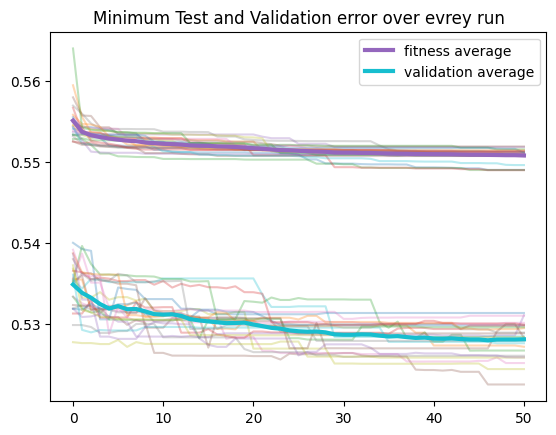

In [5]:
plot_across_all_models('simple_pred', (lambda i: i.log.select("fit_min"), "fitness"), (lambda i: i.log.select("val_min"), "validation"), title="Minimum Test and Validation error over evrey run")
#plot_across_all_models('simple_pred', lambda i: i.log.select("val_min"), title="minimum validation error simple pred")


In [6]:
best_individual = min(retrieve_from_files(lambda r: r, get_files('simple_pred')), key=lambda r: r.test_error).best_individual
print(best_individual)

combine(std(LBP(LoG2(LoG2(Region_S(Image, 90, 146, 38))))), std(HOG(LBP(Gau11(Gau11(LoG1(HOG(LBP(Gau11(LBP(Gau11(Gau11(HOG(LBP(Gau11(Gau11(HOG(LBP(Gau11(Gau11(Region_S(Image, 32, 153, 38))))))))))))))))))))))


In [7]:
def show(a_v_pairs: list[tuple[float, float]]) -> None:
    aro, val = sum(a for a, _ in a_v_pairs) / len(a_v_pairs), sum(v for _, v in a_v_pairs) / len(a_v_pairs)
    plt.scatter([a for a, _ in a_v_pairs], [v for _, v in a_v_pairs],  s=20, color=(0.1, 0.1, 1, 0.7))
    plt.scatter([aro], [val], s=100, color=(1, 0, 0, 0.7))
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.show()


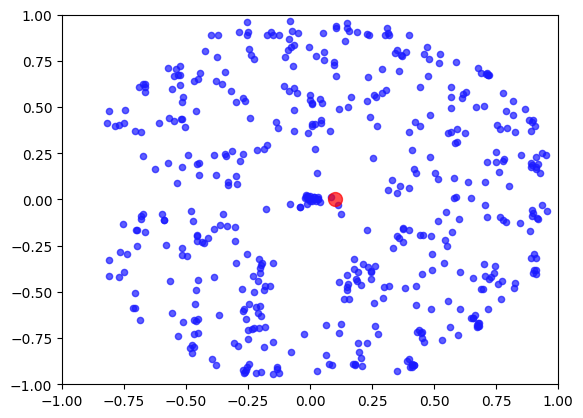

In [8]:
show(y_validation)

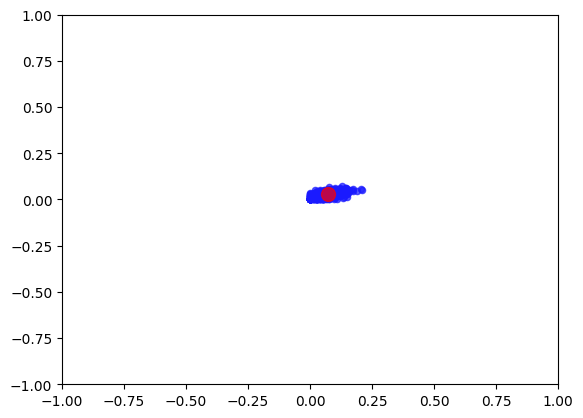

In [9]:
predictor = toolbox.compile(best_individual)
predictions = [predictor(img) for img in x_validation]
show(predictions)

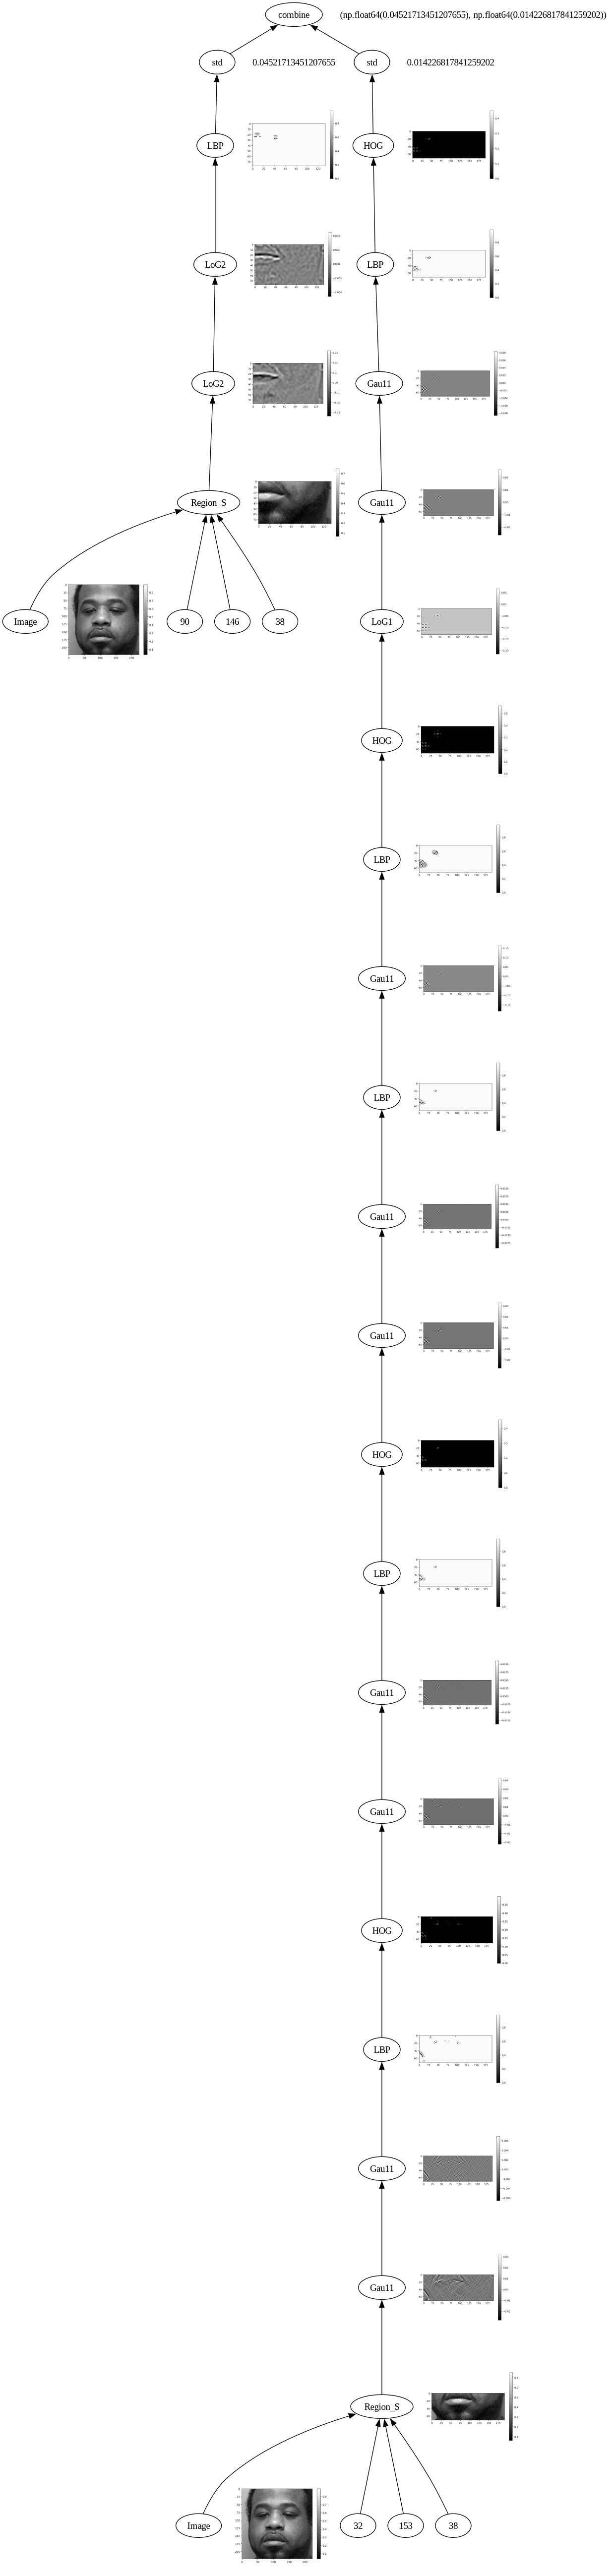

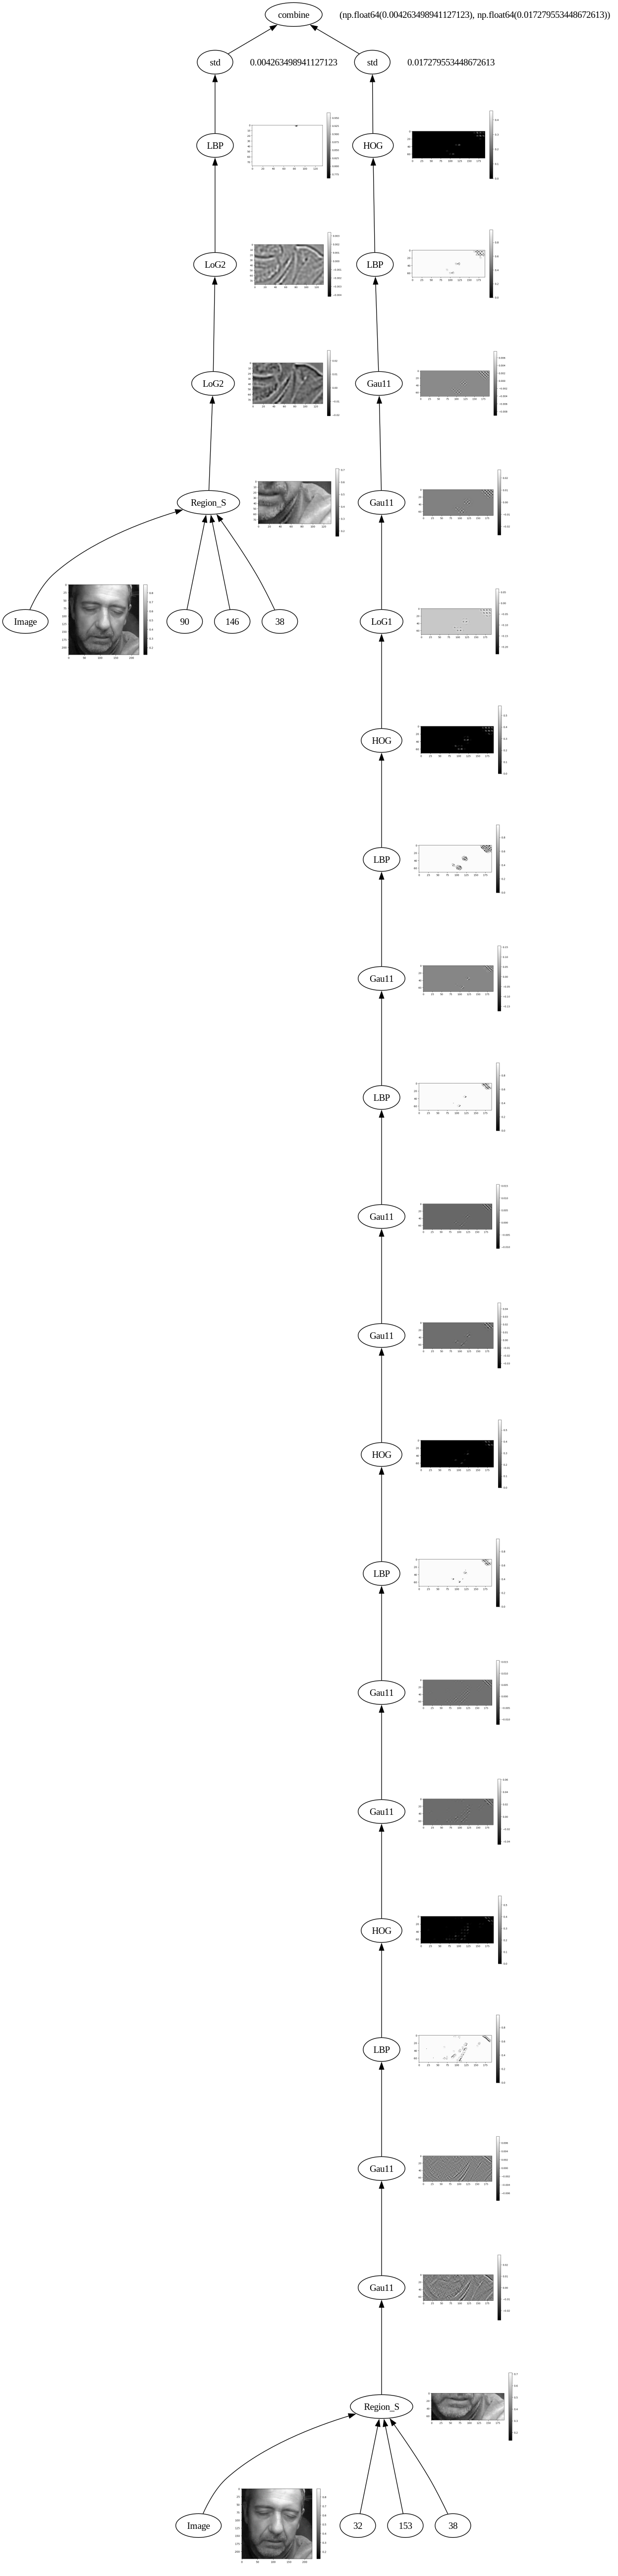

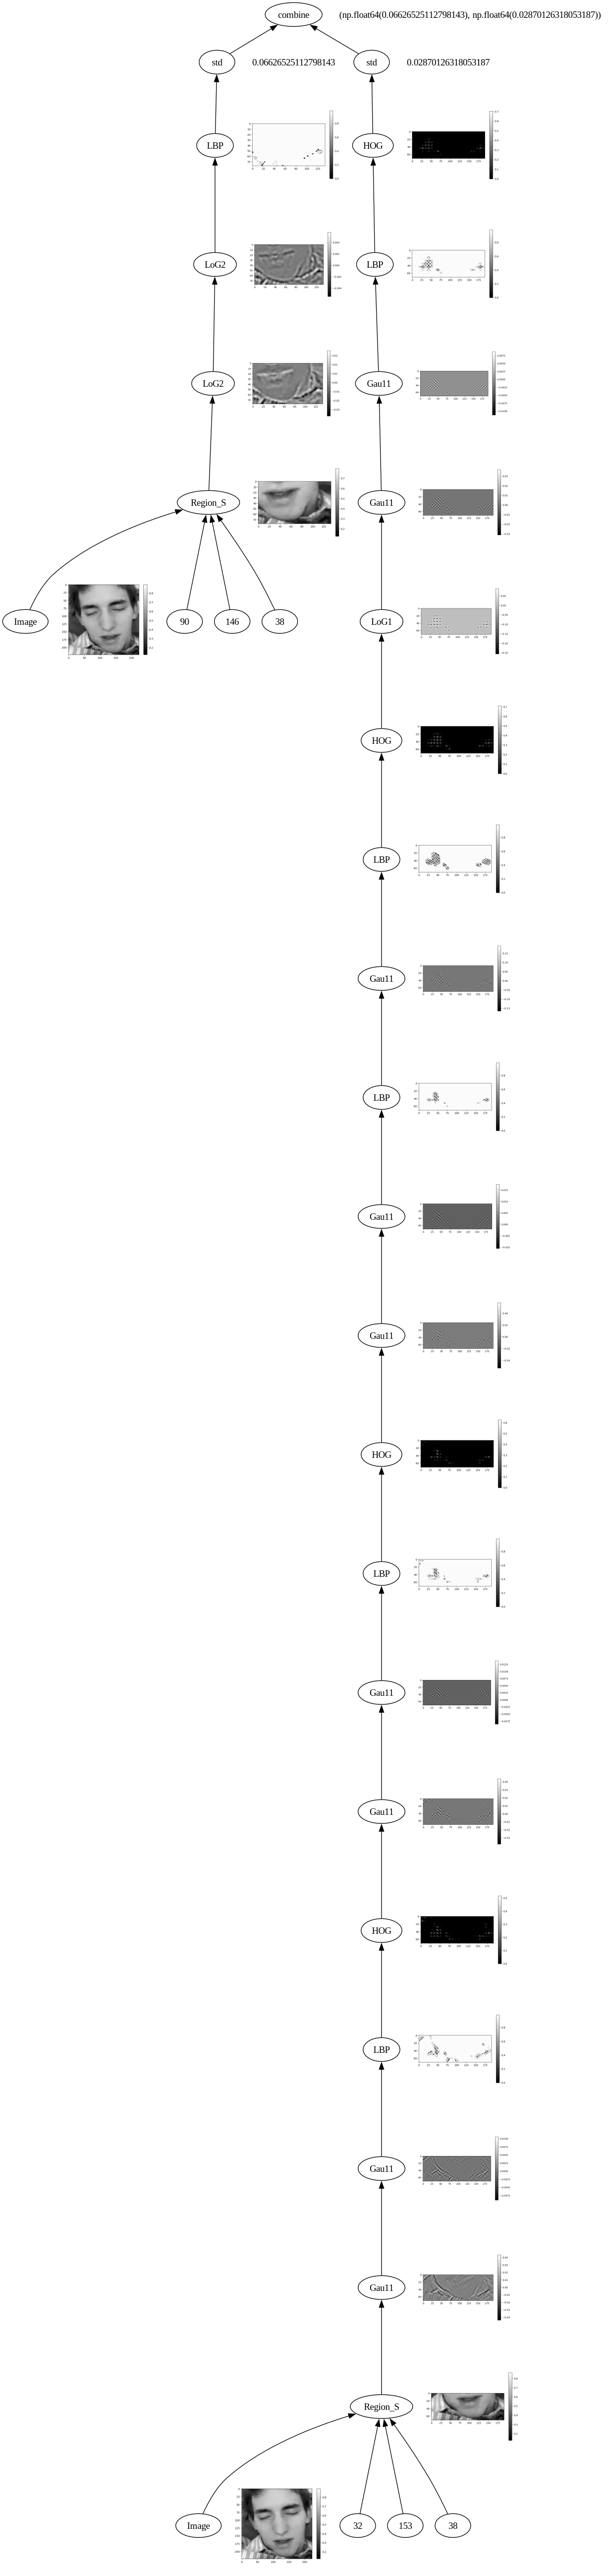

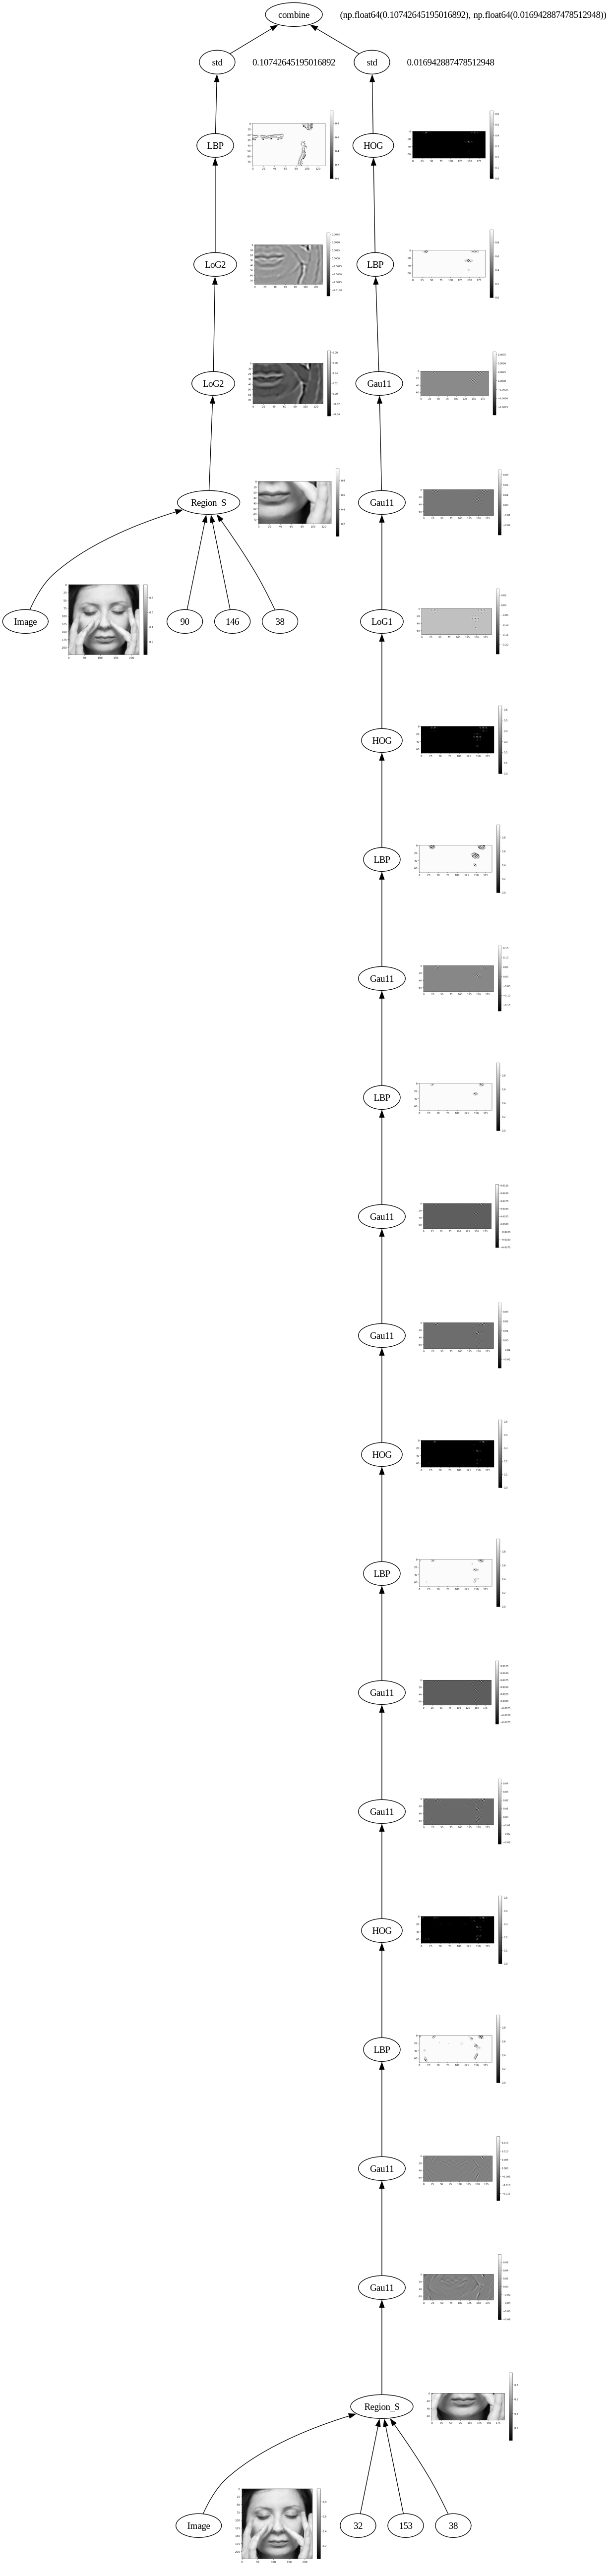

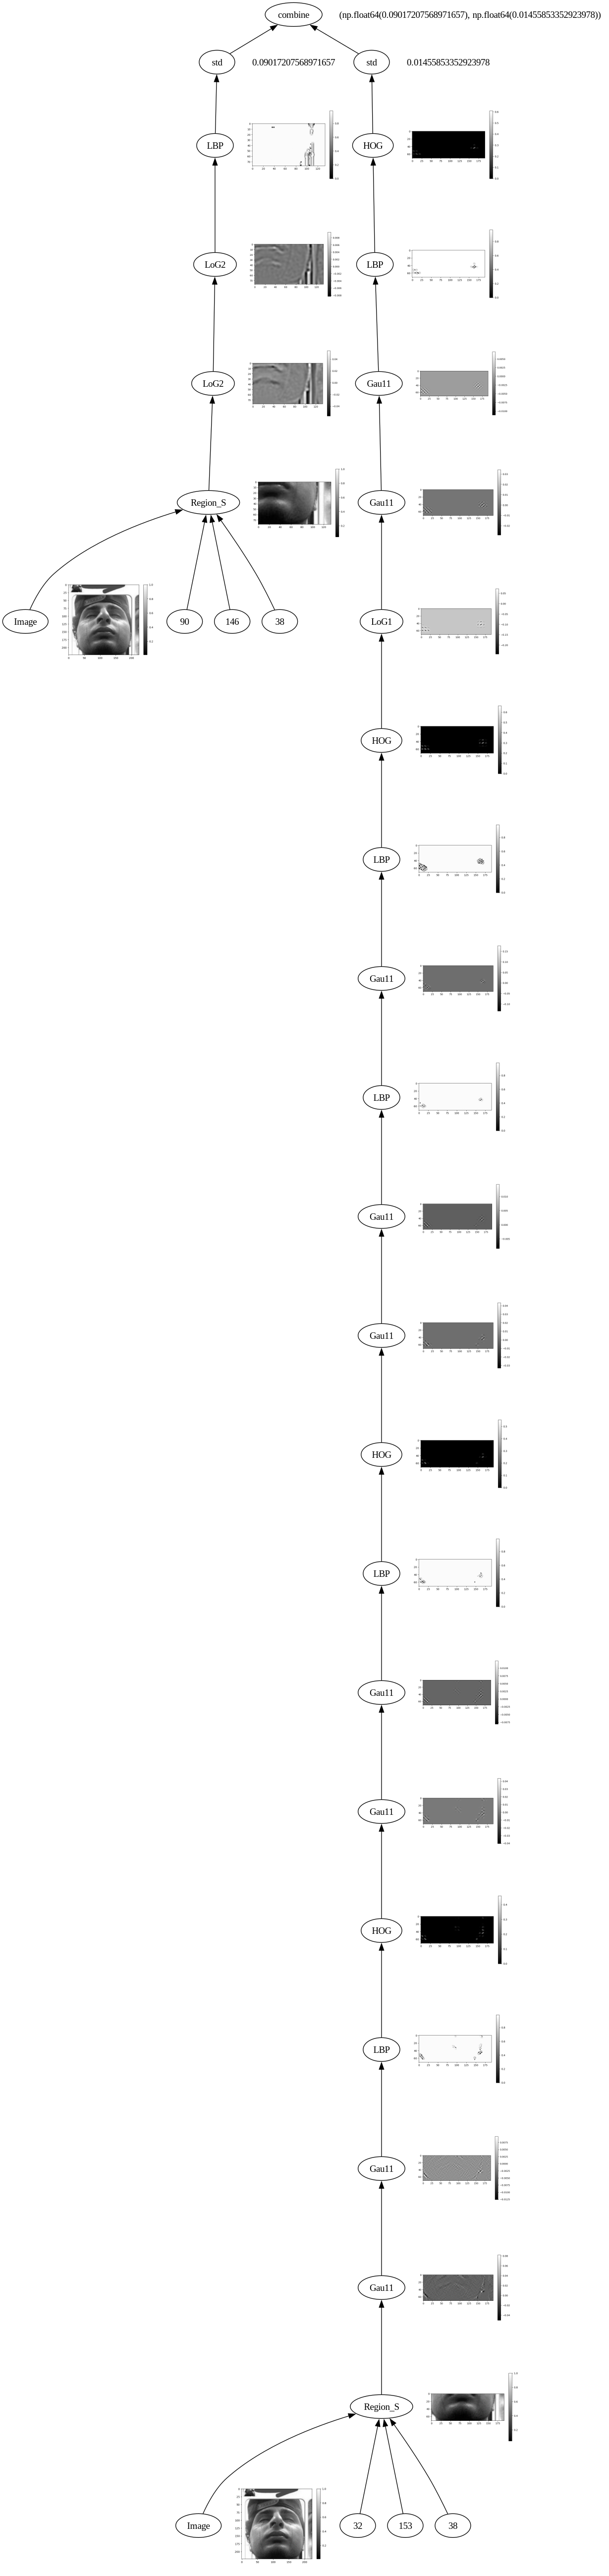

In [10]:
f = Tree.of(best_individual, pset)
for i, img in enumerate(x_train[:5]):
    f.save_graph(f"models/best_model{i}.png", img)
    display(Image(f"models/best_model{i}.png"))